In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utilities import get_git_repo_path, log_bin

# Setup
git_path = get_git_repo_path()
target_frequency = 150929  # MHz
ref_time = 463.7943 # LJ time in fs
ref_temp = 50.3219 # LJ temp in K

In [2]:
all_n = [5, 20, 80, 320, 1280]

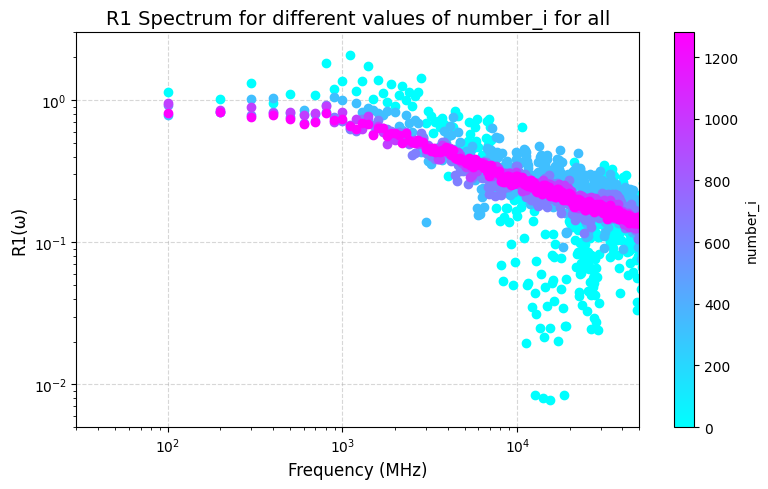

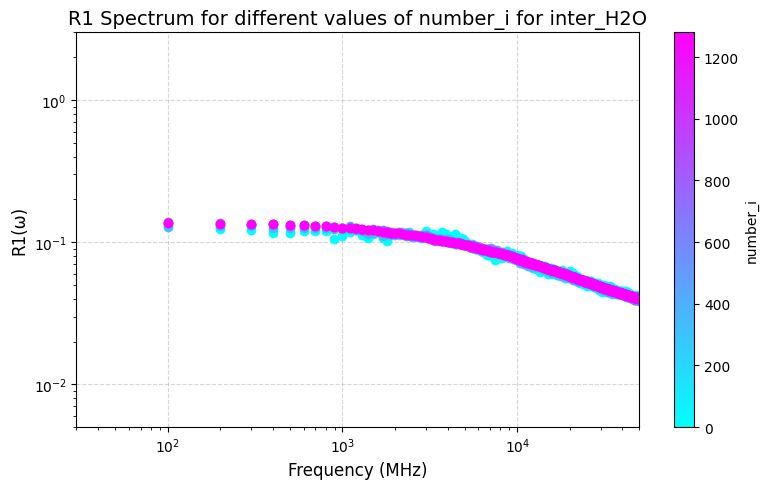

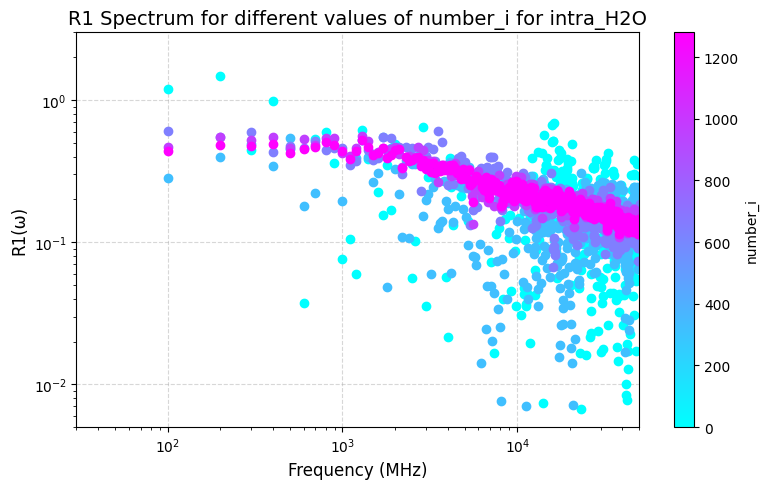

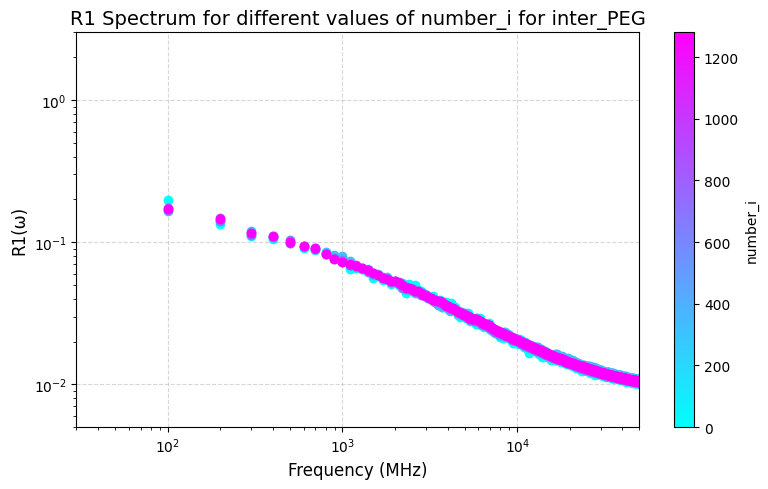

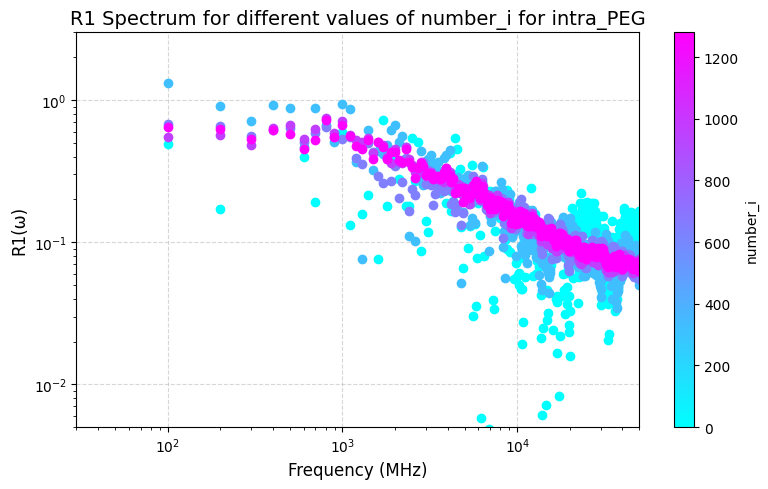

In [4]:

for type in ["all", "inter_H2O", "intra_H2O", "inter_PEG", "intra_PEG"]:

    fig, ax = plt.subplots(figsize=(8, 5))

    # Colormap and color assignment
    cmap = plt.cm.cool
    colors = cmap(np.linspace(0, 1, len(all_n)))

    # Plot each R1 spectrum
    for n, color in zip(all_n, colors):

        result_file = f"nmr_{type}/result{n}.npy"
        data = np.load(result_file, allow_pickle=True).item()
        R1 = data["R1"]
        R2 = data["R2"]
        f = data["f"]
        t = data["t"]
        gij = data["C"]

        ax.loglog(f, R1, "o", label=f"n = {n:.1f}", color=color)

        _, R1_spectra_log = log_bin(f[1:], R1[1:], num_bins = 200)
        freq_vector_log, R2_spectra_log = log_bin(f[1:], R2[1:], num_bins = 200)
        time_vector_log, correlation_function_log = log_bin(t[1:], gij[1:], num_bins = 200)
        np.savetxt(f"nmr_{type}/R1_vs_f{n}.dat", np.vstack([freq_vector_log, R1_spectra_log]).T)
        np.savetxt(f"nmr_{type}/R2_vs_f{n}.dat", np.vstack([freq_vector_log, R2_spectra_log]).T)
        np.savetxt(f"nmr_{type}/Gij_vs_t{n}.dat", np.vstack([time_vector_log, correlation_function_log]).T)

    # Axis labels and title
    ax.set_xlabel("Frequency (MHz)", fontsize=12)
    ax.set_ylabel("R1(ω)", fontsize=12)
    ax.set_title(f"R1 Spectrum for different values of number_i for {type}", fontsize=14)
    ax.grid(True, linestyle="--", alpha=0.5)

    plt.xlim([30, 5e4])
    plt.ylim([0.005, 3])

    # Colorbar representing temperature gradient
    norm = plt.Normalize(vmin=0, vmax=1280)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    cbar = fig.colorbar(sm, ax=ax, label="number_i")

    plt.tight_layout()
    plt.savefig(f"R1_{type}.png", dpi=300)
    plt.show()